In [1]:
import sqlite3
conn = sqlite3.connect('lending-club-loan-data/database.sqlite')
c = conn.cursor()

In [2]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 80)

## only select rows that are fully funded and are individual loans (no joint loans)
data=pd.read_sql('''
SELECT *
FROM loan
WHERE funded_amnt==loan_amnt AND (application_type LIKE '%INDIVIDUAL%') AND term LIKE '%36 months%'
''',conn)

In [3]:
data.drop(['index'],axis=1)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,None,10+ years,RENT,24000.00,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7%,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.0000,Jan-2015,171.62,None,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,None,None,None,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,None,10+ years,RENT,12252.00,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,None,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5%,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.0000,Jun-2014,649.91,None,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,None,None,None,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21%,37.0,f,0.00,0.00,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.0000,Jan-2015,357.48,None,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,None,None,None,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1075269,1311441.0,5000.0,5000.0,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.00,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,None,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.0,Nov-2004,3.0,NaN,NaN,9.0,0.0,7963.0,28.3%,12.0,f,0.00,0.00,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.0000,Jan-2015,161.03,None,Sep-2015,0.0,NaN,1.0,INDIVIDUAL,None,None,None,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1072053,1288686.0,3000.0,3000.0,3000.0,36 months,18.64%,109.43,E,E1,MKC Accounting,9 years,RENT,48000.00,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/16/11 > Downpayment for...,car,Car Downpayment,900xx,CA,5.35,0.0,Jan-2007,2.0,NaN,NaN,4.0,0.0,8221.0,87.5%,4.0,f,0.00,0.00,3938.144334,3938.14,3000.00,938.14,0.00,0.00,0.0000,Jan-2015,111.34,None,Dec-2014,0.0,NaN,1.0,INDIVIDUAL,None,None,None,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1069908,1305008.0,12000.0,12000.0,12000.0,36 months,12.69%,402.54,B,B5,UCLA,10+ years,OWN,75000.00,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,None,debt_consolidation,Consolidation,913xx,CA,10.78,0.0,Oct-1989,0.0,NaN,NaN,12.0,0.0,23336.0,67.1%,34.0,f,0.00,0.00,13943.080000,13943.08,12000.00,1943.08,0.00,0.00,0.0000,Sep-2013,6315.30,None,Aug-2013,0.0,NaN,1.0,INDIVIDUAL,None,None,None,0.0,NaN,Na

In [4]:
data.columns.values

array(['index', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verificat

In [5]:
feat_raw=pd.DataFrame
memberinfo=['id','loan_amnt','term','int_rate','installment','emp_title', 'emp_length', 'home_ownership',
       'annual_inc','loan_status','purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc','total_rec_prncp','total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d','collections_12_mths_ex_med', 'mths_since_last_major_derog']
feat_raw=data[memberinfo]

In [6]:
feat_raw.term=data.term.str.replace(' months','')
feat_raw.term=feat_raw.term.apply(pd.to_numeric)
feat_raw.int_rate=data.int_rate.str.replace('%','')
feat_raw.int_rate=feat_raw.int_rate.apply(pd.to_numeric)


/Users/devinmccormack/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [7]:
data[['total_rec_prncp','loan_status']]

,total_rec_prncp,loan_status
0,5000.00,Fully Paid
1,2400.00,Fully Paid
2,10000.00,Fully Paid
3,5000.00,Fully Paid
4,3000.00,Fully Paid
5,12000.00,Fully Paid
6,1256.14,Charged Off
7,3000.00,Fully Paid
8,5433.47,Charged Off
9,1000.00,Fully Paid


In [8]:
data[['last_pymnt_d','issue_d']]

,last_pymnt_d,issue_d
0,Jan-2015,Dec-2011
1,Jun-2014,Dec-2011
2,Jan-2015,Dec-2011
3,Jan-2015,Dec-2011
4,Jan-2015,Dec-2011
5,Sep-2013,Dec-2011
6,Jul-2012,Dec-2011
7,Jan-2015,Dec-2011
8,Oct-2013,Dec-2011
9,Jan-2015,Dec-2011


In [9]:
feat_raw.loc[[174036],['balance','loan_amnt','total_rec_prncp','last_pymnt_d']]

,balance,loan_amnt,total_rec_prncp,last_pymnt_d
174036,NaN,7050.0,7050.0,Jul-2012


Convert dates to date time, and then get a difference to calculate number of payments made so far

In [10]:
feat_raw['last_pymnt_d']=pd.to_datetime(data.last_pymnt_d, format='%b-%Y')
feat_raw['issue_d']=pd.to_datetime(data.issue_d, format='%b-%Y')


/Users/devinmccormack/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/devinmccormack/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [11]:
feat_raw['num_pymnts']=round((feat_raw.last_pymnt_d-feat_raw.issue_d)/ np.timedelta64(1, 'M'))

/Users/devinmccormack/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [12]:
feat_raw['pymnts_left']=(feat_raw.term-feat_raw.num_pymnts).fillna(0)

/Users/devinmccormack/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [13]:
feat_raw['current']=feat_raw.loan_status.str.match('Current')

/Users/devinmccormack/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


## Developed metric to optimize

We want to maximize the total money gained vs the loan amount. This is called a "buy rate" multiplier. For example, If a borrower receives \$12,000 and pays back \$15,000, the buy rate is 1.25, and can effectvely be thought of as 1+ interest. Although LC loans are amortized, a buy rate is a post hoc measure that penalizes loans paid early. Importantly, we do not want to penalize loans still current and in the process of payment, so the metric will have a logical gate to apply a different divisor to current loans.

For fully paid, late, and charged off loans, the equation takes the total amount paid to date, and divides it by the initial investment amount.

**Equation 1: "settled" loan buy rate** 
$$[buy\ rate]=\frac{[total\ payments\ received]}{[loan\ amount]}$$

Where the total payments received sums principle, interest, and late fee paid. A loan paid off with zero interest accrued or paid will have a value of 1.0, charged off loans will have values less than 1, and all other paid off loans will have a multiplier equivalent to 1+effective interest rate. 

Notably, this unfairly penalizes loans that were categorized as *"late"* during the time the data was acquired, but I'm okay with that as late loans are intuitively riskier than current loans that have been brought up to current. This is a potential assumption to probe at some point, however I think the overwhelming number of current, fully paid, and charged off loans will make this unimportant. It is worth noting that loans that were ever late are harder to sell on the secondary loan market, so even if they were brought to current, late loans have less potential liquidity.
 
For current loans, I approximate the expected principle return as the investment amount divided over the length of the loan, and prorated for the number of months the loan has been active 

**Equation 2: "current" loan buy rate**
$$[buy\ rate]=\frac{[payments\ received\ to\ date]}{(\frac{[loan\ amount]}{[loan\ term]}*[months\ active])}$$

Amortization is not linear (more interest is paid up front), but amortization only matters if loans are paid off early, and the fully paid loans are handled with the simpler equation above. This simple metric is blind to loans that will be paid off early, or that will default (both will lower effective "buy rate") in the future, and assumes all current loans will be paid off according to schedule.

Effectively, current and fully paid (on schedule) loans will have buy rates tied directly to their interest rate. Loans paid off early will be penalized slightly from their given interest rate. Defaulted and late loans will be penalized according to how much of the principle was paid, with a 0 being a total loss, and values below 1.0 being partial losses. Interestingly, loans that accrue late fees but eventually are paid in full on schedule will be rewarded slightly. I'm not confident that this happens often enough (in comparision to late fee paying loans that eventually default) to incentivize risky loans appreciably more than the interest rate does on it's own.

Importantly, as LC sets interest rates according to the same borrower data that I can use (and potentially they actually have more), this is an exercise in finding slippage in the general loan market algorithm, heavily incentivized towards finding borrowers who appear (to loaners) riskier than the data says they are. 

### "Smart" metric (with logical gate dependent on "current" feature)
This is the metric we want to regress.

In [14]:
feat_raw['balance1']=(data.total_rec_prncp+data.total_rec_int+data.total_rec_late_fee)/((feat_raw.loan_amnt/feat_raw.term)*(feat_raw.current*(feat_raw.term-feat_raw.pymnts_left)+(1-feat_raw.current)*feat_raw.term))





/Users/devinmccormack/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


### "Dumb" metric which is correct for settled loans, but penalizes current loans
this would be a poor metric to take advantage of all loan data, but could be used if we just looked at settled loans.

In [15]:
feat_raw['balance2']=(data.total_rec_prncp+data.total_rec_int+data.total_rec_late_fee)/(feat_raw.loan_amnt)

/Users/devinmccormack/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


### Comparison of metrics
balance1 is equal to balance2 when loans are settled, and it prorates current loans, while balance2 penalizes them since they are not fully paid.

In [16]:
feat_raw[['balance1','balance2','pymnts_left','loan_status','num_pymnts','total_rec_prncp','total_rec_int','total_rec_late_fee']]

,balance1,balance2,pymnts_left,loan_status,num_pymnts,total_rec_prncp,total_rec_int,total_rec_late_fee
0,1.172214,1.172214,-1.0,Fully Paid,37.0,5000.00,861.07,0.00
1,1.251521,1.251521,6.0,Fully Paid,30.0,2400.00,603.65,0.00
2,1.222630,1.222630,-1.0,Fully Paid,37.0,10000.00,2209.33,16.97
3,1.126276,1.126276,-1.0,Fully Paid,37.0,5000.00,631.38,0.00
4,1.312713,1.312713,-1.0,Fully Paid,37.0,3000.00,938.14,0.00
5,1.161923,1.161923,15.0,Fully Paid,21.0,12000.00,1943.08,0.00
6,0.202933,0.202933,29.0,Charged Off,7.0,1256.14,570.26,0.00
7,1.159660,1.159660,-1.0,Fully Paid,37.0,3000.00,478.98,0.00
8,0.682689,0.682689,14.0,Charged Off,22.0,5433.47,1393.42,0.00
9,1.270170,1.270170,-1.0,Fully Paid,37.0,1000.00,270.17,0.00


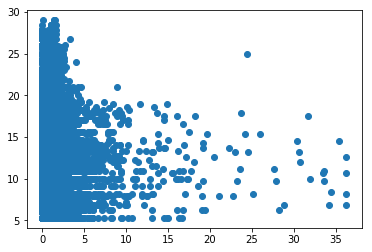

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(feat_raw.balance1,feat_raw.int_rate)
plt.show()

Interestingly, there are a lot of loans with really high mutliples. What is causing this? Ideally I expect values between 0 and 2 at the greatest. What is the metric missing?

In [23]:
feat_raw.query('balance1>5 & num_pymnts>1')

,id,loan_amnt,term,int_rate,installment,emp_title,emp_length,home_ownership,annual_inc,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,collections_12_mths_ex_med,mths_since_last_major_derog,issue_d,num_pymnts,pymnts_left,current,balance1,balance2
362972,65926528,1000.0,36,11.99,33.21,Trade Admin,5 years,RENT,60000.0,Current,credit_card,PA,9.08,1.0,Nov-2002,2.0,2.0,NaN,8.0,0.0,2451.0,11.6%,25.0,999.67,9.32,0.0,0.0,0.0,2016-01-01,1009.66,Jan-2016,0.0,NaN,2015-11-01,2.0,34.0,True,18.161820,1.008990
363478,66106108,3500.0,36,9.17,111.58,Senior veterinary technician,5 years,MORTGAGE,60000.0,Current,home_improvement,NJ,9.48,0.0,Oct-2004,2.0,26.0,NaN,14.0,0.0,1070.0,4.4%,22.0,973.25,24.97,0.0,0.0,0.0,2016-01-01,1000.00,Jan-2016,0.0,NaN,2015-11-01,2.0,34.0,True,5.133703,0.285206
364008,65666921,21600.0,36,17.57,776.25,Manager,10+ years,RENT,60000.0,Current,debt_consolidation,GA,26.79,1.0,Oct-1995,0.0,20.0,NaN,22.0,0.0,22525.0,36.6%,34.0,18991.99,368.97,0.0,0.0,0.0,2016-01-01,19382.04,Feb-2016,0.0,62.0,2015-11-01,2.0,34.0,True,16.134133,0.896341
366367,65757440,2650.0,36,7.26,82.14,Clinical Services Coordinator,5 years,MORTGAGE,36406.5,Current,other,CA,2.24,0.0,Apr-1982,0.0,NaN,NaN,6.0,0.0,3596.0,10.8%,22.0,731.55,12.02,0.0,0.0,0.0,2016-01-01,82.14,Jan-2016,0.0,NaN,2015-11-01,2.0,34.0,True,5.050664,0.280592
371794,65713455,7500.0,36,6.24,228.99,Teacher,10+ years,RENT,62250.0,Current,debt_consolidation,WI,31.00,0.0,May-1991,0.0,NaN,NaN,15.0,0.0,4947.0,34.4%,35.0,5445.45,33.80,0.0,0.0,0.0,2016-01-01,228.99,Feb-2016,0.0,NaN,2015-11-01,2.0,34.0,True,13.150200,0.730567
372293,65642870,12000.0,36,9.17,382.55,Financial Counselor Supervisor,2 years,MORTGAGE,65000.0,Current,debt_consolidation,FL,12.98,1.0,Jun-2000,1.0,22.0,NaN,17.0,0.0,6871.0,12.8%,26.0,4120.55,132.32,0.0,0.0,0.0,2016-01-01,382.55,Feb-2016,0.0,NaN,2015-11-01,2.0,34.0,True,6.379305,0.354406
373006,65662532,6800.0,36,17.57,244.38,Manager,10+ years,OWN,77000.0,Current,home_improvement,GA,7.61,1.0,Oct-1994,1.0,10.0,62.0,7.0,2.0,2002.0,47.7%,11.0,5343.00,132.48,0.0,0.0,0.0,2016-01-01,244.38,Feb-2016,0.0,NaN,2015-11-01,2.0,34.0,True,14.493918,0.805218
373464,65762414,8000.0,36,17.57,287.50,None,n/a,OWN,23000.0,Current,debt_consolidation,GA,39.25,0.0,Jul-2004,1.0,NaN,73.0,13.0,1.0,1929.0,13.3%,24.0,4045.76,155.05,0.0,0.0,0.0,2016-01-01,3787.50,Feb-2016,0.0,NaN,2015-11-01,2.0,34.0,True,9.451823,0.525101
373766,65602045,29400.0,36,10.99,962.38,CEO,6 years,RENT,88500.0,Current,credit_card,MA,12.14,1.0,May-1989,1.0,9.0,NaN,16.0,0.0,12642.0,21.8%,42.0,27255.08,151.73,0.0,0.0,0.0,2016-01-01,962.38,Feb-2016,0.0,NaN,2015-11-01,2.0,34.0,True,16.779680,0.932204
373948,65831730,11000.0,36,5.32,331.27,Investment Analyst,3 years,MORTGAGE,86000.0,Current,major_purchase,IL,0.70,0.0,Aug-1996,1.0,NaN,NaN,8.0,0.0,2709.0,5%,20.0,9077.56,81.73,0.0,0.0,0.0,2016-01-01,331.27,Feb-2016,0.0,NaN,2015-11-01,2.0,34.0,True,14.987929,0.832663


There are two things to note: firstly, there are *current* loans with no payments, creating a metric with a value of infinite. Not only do these loans break the metric, they also give almost no information to our algorithm, since they only thing we know is that they were funded. Secondly, it looks like the highest values are directly due to a large upfront lumpsum payment as the only payment, and values between the highest and 2 are loans with a large lump sum and additional regular payments. The more payment since the lump sum, the closer to "convential" values.

I will approach this in two ways: setting a minimum number of payments required to be included - lets say 6 payments, and secondly by attenuating large lump sums payments that do not fully pay the loan.

### First, filter loans less than 6 months old

explicitly, we want to exclude loans less than 6 months old, NOT loans with less than 6 payments. A non-negligible number of loans default with no payments at all.

In [19]:
feat_inform=feat_raw.query('num_pymnts >6.0')

In [20]:
feat_inform[['balance1','balance2','pymnts_left','loan_status','total_rec_prncp','total_rec_int','total_rec_late_fee']]

,balance1,balance2,pymnts_left,loan_status,total_rec_prncp,total_rec_int,total_rec_late_fee
0,1.172214,1.172214,-1.0,Fully Paid,5000.00,861.07,0.00
1,1.251521,1.251521,6.0,Fully Paid,2400.00,603.65,0.00
2,1.222630,1.222630,-1.0,Fully Paid,10000.00,2209.33,16.97
3,1.126276,1.126276,-1.0,Fully Paid,5000.00,631.38,0.00
4,1.312713,1.312713,-1.0,Fully Paid,3000.00,938.14,0.00
5,1.161923,1.161923,15.0,Fully Paid,12000.00,1943.08,0.00
6,0.202933,0.202933,29.0,Charged Off,1256.14,570.26,0.00
7,1.159660,1.159660,-1.0,Fully Paid,3000.00,478.98,0.00
8,0.682689,0.682689,14.0,Charged Off,5433.47,1393.42,0.00
9,1.270170,1.270170,-1.0,Fully Paid,1000.00,270.17,0.00


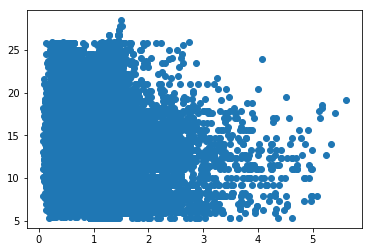

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(feat_inform.balance1,feat_inform.int_rate)
plt.show()

### Uninformative loans
Good, this deals with uninformative loans. Loans less that 6 months old likely have little information to give on the problem

In [22]:
data.loc[[12],['total_rec_prncp','total_rec_int','total_rec_late_fee','loan_status','last_pymnt_d','issue_d']]

,total_rec_prncp,total_rec_int,total_rec_late_fee,loan_status,last_pymnt_d,issue_d
12,6000.0,1149.5,15.0,Fully Paid,Feb-2015,Dec-2011
